# UUIDs
## Background
Universally Unique Identifiers (UUIDs) provide convenient mechanisms for identifying pieces of information (objects) inside an information system. Various conventions exist. However, general patterns have been established and formalized as RFC 4122.

Comprised of hex digits, UUIDs have the pattern `8-4-4-4-12`, e.g. `e45ba2cc-39db-11e9-8e62-7470fdf23ef1`.

It adds up to 36 characters (32 hex + 4 hyphens), or 16 bytes of information (128 bits).

In [1]:
import uuid

In [2]:
help(uuid.uuid1)

Help on function uuid1 in module uuid:

uuid1(node=None, clock_seq=None)
    Generate a UUID from a host ID, sequence number, and the current time.
    If 'node' is not given, getnode() is used to obtain the hardware
    address.  If 'clock_seq' is given, it is used as the sequence number;
    otherwise a random 14-bit sequence number is chosen.



In [3]:
# use the current hardware address and time
[uuid.uuid1() for _ in range(5)]

[UUID('41e09e0e-3c2d-11e9-9333-7470fdf23ef1'),
 UUID('41e09e0f-3c2d-11e9-9333-7470fdf23ef1'),
 UUID('41e09e10-3c2d-11e9-9333-7470fdf23ef1'),
 UUID('41e09e11-3c2d-11e9-9333-7470fdf23ef1'),
 UUID('41e09e12-3c2d-11e9-9333-7470fdf23ef1')]

In [4]:
# use fixed values
[uuid.uuid1(0,0) for _ in range(5)]

[UUID('41e2cd06-3c2d-11e9-8000-000000000000'),
 UUID('41e2cd9e-3c2d-11e9-8000-000000000000'),
 UUID('41e2cde8-3c2d-11e9-8000-000000000000'),
 UUID('41e2ce22-3c2d-11e9-8000-000000000000'),
 UUID('41e2ce58-3c2d-11e9-8000-000000000000')]

In [5]:
help(uuid.uuid3)

Help on function uuid3 in module uuid:

uuid3(namespace, name)
    Generate a UUID from the MD5 hash of a namespace UUID and a name.



In [6]:
help(uuid.uuid5)

Help on function uuid5 in module uuid:

uuid5(namespace, name)
    Generate a UUID from the SHA-1 hash of a namespace UUID and a name.



In [7]:
top = uuid.UUID('00000000-0000-0000-0000-000000000000')
topic = uuid.uuid5(top, 'Neuroscience')
subject1 = uuid.uuid5(topic, 'Habenula')
subject2 = uuid.uuid5(topic, 'Entorhinal cortex')
subject3 = uuid.uuid5(topic, 'Habenula')
[topic, subject1, subject2, subject3]

[UUID('913e0174-a390-5c08-b50a-623690546dd5'),
 UUID('b5804c3f-57b1-54e3-8176-3b45aa443a97'),
 UUID('58571fff-c6bd-583f-88ac-ef0b8ff2981f'),
 UUID('b5804c3f-57b1-54e3-8176-3b45aa443a97')]

In [8]:
help(uuid.uuid4)

Help on function uuid4 in module uuid:

uuid4()
    Generate a random UUID.



In [9]:
[uuid.uuid4() for _ in range(12)]

[UUID('de7c80c9-ec3b-460f-af5c-3eec946b6a20'),
 UUID('79a706d8-e25d-4e83-8289-e07e2bc4451b'),
 UUID('fb9e95ef-b8b3-4b6e-8331-3f633b0a6254'),
 UUID('c293dc4e-c2d8-499b-b161-cb04c05196a7'),
 UUID('f0683133-adb5-4e62-9b31-f889f1475a80'),
 UUID('b0178fbc-cc18-406b-b2a8-dcda1ccd2f15'),
 UUID('1c92fd4d-692a-4ecf-adf3-662e64d03609'),
 UUID('0a39ff99-da1d-41ac-a64b-d75db825308d'),
 UUID('12ad78c0-9107-4a5d-94b7-0de2c7b97a66'),
 UUID('8e18f3d9-89e7-4157-97b6-3c3fddb72c4a'),
 UUID('6c83950b-39ca-48c6-998f-ede3a754f75d'),
 UUID('f53b30b9-b1d7-4d65-abf8-f475b40d8cb8')]

In [10]:
a = uuid.uuid4()
s = str(a)

In [11]:
a, s

(UUID('790e3c03-d8c6-4f11-b9bb-b70544017e18'),
 '790e3c03-d8c6-4f11-b9bb-b70544017e18')

In [12]:
uuid.UUID(s)

UUID('790e3c03-d8c6-4f11-b9bb-b70544017e18')

## UUIDs in DataJoint

In [13]:
import datajoint as dj
dj.__version__

'0.12.dev2'

In [14]:
schema = dj.schema('dimitri_uuid')

Connecting dimitri@127.0.0.1:3306


In [15]:
@schema
class Message(dj.Manual):
    definition = """
    message_id : uuid  # internal message id
    ---
    message_body : varchar(1000) 
    nice : bool
    """

In [16]:
Message.describe();

message_id           : uuid                         # internal message id
---
message_body         : varchar(1000)                
nice                 : tinyint                      



In [17]:
# Internally, DataJoint represents uuids as a BINARY(16) datatypes but users don't need to know
Message.heading['message_id'].sql

'`message_id` binary(16) NOT NULL COMMENT ":uuid:internal message id"'

In [18]:
Message.insert1((uuid.uuid1(), 'Hello, world!', 1))
Message.insert1((uuid.uuid1(), 'Cogito ergo sum', True))

In [19]:
Message()

message_id internal message id,message_body,nice
1c6e6421-3c2d-11e9-9333-7470fdf23ef1,"Hello, world!",1
1c6e6422-3c2d-11e9-9333-7470fdf23ef1,Cogito ergo sum,1
1f9c7314-c1aa-40b7-a4a8-57b9b1e35c3f,I will be back,0
41e09e13-3c2d-11e9-9333-7470fdf23ef1,"Hello, world!",1
41e09e14-3c2d-11e9-9333-7470fdf23ef1,Cogito ergo sum,1
7acecd51-93f9-413e-a315-fbfaba53926b,Must destroy humans.,0
ac32c370-4894-4b92-9ef2-bfdc89bcc917,I will be back,0
b52144d2-3c2c-11e9-9333-7470fdf23ef1,"Hello, world!",1
b52144d3-3c2c-11e9-9333-7470fdf23ef1,Cogito ergo sum,1
cf6dacde-650e-469c-969e-bd7d7bdaf460,Must destroy humans.,0


In [20]:
Message.insert1((uuid.uuid4(), 'I will be back', 0))
Message.insert1((uuid.uuid4(), 'Must destroy humans.', False))

In [21]:
Message()

message_id internal message id,message_body,nice
1c6e6421-3c2d-11e9-9333-7470fdf23ef1,"Hello, world!",1
1c6e6422-3c2d-11e9-9333-7470fdf23ef1,Cogito ergo sum,1
1f9c7314-c1aa-40b7-a4a8-57b9b1e35c3f,I will be back,0
41e09e13-3c2d-11e9-9333-7470fdf23ef1,"Hello, world!",1
41e09e14-3c2d-11e9-9333-7470fdf23ef1,Cogito ergo sum,1
7acecd51-93f9-413e-a315-fbfaba53926b,Must destroy humans.,0
a07f9b63-ebd0-49d7-91be-2ad7a1098ae2,I will be back,0
ac32c370-4894-4b92-9ef2-bfdc89bcc917,I will be back,0
b52144d2-3c2c-11e9-9333-7470fdf23ef1,"Hello, world!",1
b52144d3-3c2c-11e9-9333-7470fdf23ef1,Cogito ergo sum,1


In [22]:
@schema
class Comment(dj.Manual):
    definition = """
    comment_id : uuid
    --- 
    -> Message
    comment_body : varchar(1000)
    """

In [23]:
Comment.describe();

comment_id           : uuid                         
---
-> Message
comment_body         : varchar(1000)                



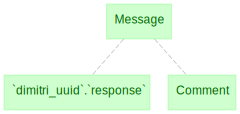

In [24]:
dj.Diagram(schema)

In [25]:
keys = Message.fetch('KEY')

In [26]:
# For the curious, this is how the table is declared in SQL
print(schema.connection.query('show create table `dimitri_uuid`.`comment`').fetchall()[0][1])

CREATE TABLE `comment` (
  `comment_id` binary(16) NOT NULL COMMENT ':uuid:',
  `message_id` binary(16) NOT NULL COMMENT ':uuid:internal message id',
  `comment_body` varchar(1000) NOT NULL,
  PRIMARY KEY (`comment_id`),
  KEY `message_id` (`message_id`),
  CONSTRAINT `comment_ibfk_1` FOREIGN KEY (`message_id`) REFERENCES `message` (`message_id`) ON UPDATE CASCADE
) ENGINE=InnoDB DEFAULT CHARSET=latin1


In [27]:
Comment.insert1(dict(keys[0], comment_id=uuid.uuid1(), comment_body="thank you"))

In [28]:
Comment.insert1(dict(keys[1], comment_id=uuid.uuid1(), comment_body="thank you"))

In [29]:
str(uuid.uuid1())

'41e09e17-3c2d-11e9-9333-7470fdf23ef1'

In [30]:
keys

[{'message_id': UUID('1c6e6421-3c2d-11e9-9333-7470fdf23ef1')},
 {'message_id': UUID('1c6e6422-3c2d-11e9-9333-7470fdf23ef1')},
 {'message_id': UUID('1f9c7314-c1aa-40b7-a4a8-57b9b1e35c3f')},
 {'message_id': UUID('41e09e13-3c2d-11e9-9333-7470fdf23ef1')},
 {'message_id': UUID('41e09e14-3c2d-11e9-9333-7470fdf23ef1')},
 {'message_id': UUID('7acecd51-93f9-413e-a315-fbfaba53926b')},
 {'message_id': UUID('a07f9b63-ebd0-49d7-91be-2ad7a1098ae2')},
 {'message_id': UUID('ac32c370-4894-4b92-9ef2-bfdc89bcc917')},
 {'message_id': UUID('b52144d2-3c2c-11e9-9333-7470fdf23ef1')},
 {'message_id': UUID('b52144d3-3c2c-11e9-9333-7470fdf23ef1')},
 {'message_id': UUID('cf6dacde-650e-469c-969e-bd7d7bdaf460')},
 {'message_id': UUID('e32a69c3-56f8-4fac-975f-4e916efac5c2')}]

In [31]:
Message()

message_id internal message id,message_body,nice
1c6e6421-3c2d-11e9-9333-7470fdf23ef1,"Hello, world!",1
1c6e6422-3c2d-11e9-9333-7470fdf23ef1,Cogito ergo sum,1
1f9c7314-c1aa-40b7-a4a8-57b9b1e35c3f,I will be back,0
41e09e13-3c2d-11e9-9333-7470fdf23ef1,"Hello, world!",1
41e09e14-3c2d-11e9-9333-7470fdf23ef1,Cogito ergo sum,1
7acecd51-93f9-413e-a315-fbfaba53926b,Must destroy humans.,0
a07f9b63-ebd0-49d7-91be-2ad7a1098ae2,I will be back,0
ac32c370-4894-4b92-9ef2-bfdc89bcc917,I will be back,0
b52144d2-3c2c-11e9-9333-7470fdf23ef1,"Hello, world!",1
b52144d3-3c2c-11e9-9333-7470fdf23ef1,Cogito ergo sum,1


In [32]:
Comment()

comment_id,message_id internal message id,comment_body
370dea7c-3c2d-11e9-9333-7470fdf23ef1,1c6e6422-3c2d-11e9-9333-7470fdf23ef1,thank you
41e09e15-3c2d-11e9-9333-7470fdf23ef1,1c6e6421-3c2d-11e9-9333-7470fdf23ef1,thank you
41e09e16-3c2d-11e9-9333-7470fdf23ef1,1c6e6422-3c2d-11e9-9333-7470fdf23ef1,thank you


In [33]:
Message & keys[2]

message_id internal message id,message_body,nice
1f9c7314-c1aa-40b7-a4a8-57b9b1e35c3f,I will be back,0


In [ ]:
schema.drop()